In [303]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Bracketing and Local-Descent methods for optimization

## Theory
This notebook outlines a approach to find the global minimum of a  [univariate](https://en.wikipedia.org/wiki/Univariate) function $f(x)$ of
a real variable $x$.

$$
\min_{x} f(x)
$$

we denote with $\hat{x}$ the value of $x$ that gives the minimum of $f$. That is,

$$
\hat{x} = \arg\min_{x} f(x)
$$

is the argument that minimizes the function $f$. 
What about the maximum of $f$? Note that,

$$
\hat{x} = \arg\max_{x} f(x) =  \arg\min_{x} -f(x)
$$

Therefore, if we have an algorithm that allows us to find the minimum $\hat{x}$ of a function
that we can use it to find the maximum of a function by minimizing $-f$.

### Examples of unimodal functions with a unique global minimum
$$
f(x) = x^2,~~f(x) = x^4,~~f(x)=|x|,~~f(x)=-\frac{1}{x^2+1}
$$

<div class="alert alert-block alert-success">
<b>Forum Question:</b> Give an example of a function with a local minimum that is not a
global minimum?
</div>



## Optimisation problems from Machine Learning
In this module, we will use optimisation problems coming from Machine Learning as case study.
In this way, we can *kill two birds with one stone*:
* we learn optimisation algorithms;
* we learn how to apply them to ML.

## Working example


Note that, in general recipe ML, we aim to build
$$
y=g(x,\theta)
$$
a general ML algorithm (regression, classification) that takes as input $x$ and  outputs $y$, with $\theta$ denoting
its parameters. So in this case the parameter we aim to optimize is denoted by $\theta$.

**Training phase**, it uses the data $D=\{(x_i,y_i):~i=1,\dots,N\}$ to solve the following optimsiation problem:
$$
\hat{\theta}:=\arg\min_{\theta \in \Theta}   \sum_{i=1}^N L(y_i,g(x_i,\theta))
$$
where $L(\cdot,\cdot)$ is called loss function.

**Prediction**:
$$
\hat{y}=g(x_{pred},\hat{\theta})
$$
This is a general formulation: it holds for linear regression but also for neural networks,
deep neural networks and any other standard ML algorithm.


### Optimisation
In general recipe ML, fitting is equivalent to optimsing:
$$
\hat{\theta}:=\arg\min_{\theta \in \Theta}   \sum_{i=1}^N L(y_i,g(x_i,\theta))
$$
Note that, in ML, the variabe $x$ is usually used to denote the inputs, the optimisation
variable(s) is denoted as $\theta$.

Observe also that
* optimisation variable $\theta$  is in general a vector of variables;
* sometimes we have constraints $\theta \in \Theta$;
* cost (loss) function $L(\cdot,\cdot)$ is our objective function, that is our goal in the optimization.

<div class="alert alert-block alert-success">
<b>Forum Question:</b> Can you think about an example of constrained optimisation
    in ML, that is a ML regression/classification algorithm for which the parameters  $\theta$
    of the model are constrained into a region $\Theta\subset \mathbb{R}^p$, where $p$
    is the dimension of $\theta$?
</div>

### A practical example: linear regression
Let's now focus on linear regression in the case where there is not **intercept**.

We first generate some data.

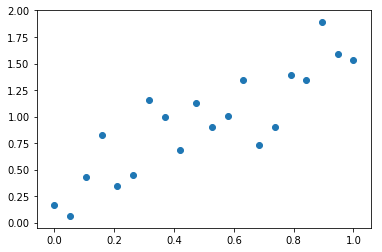

In [304]:
# generate some data
np.random.seed(42)
x = np.linspace(0,1,20)
β = 2
y = x*β + np.random.randn(len(x))/3.0
plt.scatter(x,y)

#### Least-Squares method
In case of 1D Linear Regression without intercept we have
$$
y=\beta\,x
$$
it takes as input $x$ and  outputs $y$, with $\theta=\beta$ denoting
its parameters.

**Training phase**, it uses the data $D=\{(x_i,y_i):~i=1,\dots,N\}$ (that is the coordinates of the blue dots
in figure) to find the optimal $\beta$:
$$
\hat{\beta}:=\arg\min_{\beta}   \sum_{i=1}^N (y_i-\beta\,x_i)^2
$$



#### What type of optimisation problem is it?
Answering these questions is fundamental to choose the right optimization algorithm
* Is it univariate or multivariate?
* Is it linear or nonlinear?
* Is it [convex](https://en.wikipedia.org/wiki/Convex_function) or not?
* Is it constrained?
* Is it differentiable? (class C$^1$, C$^2$ etc..)


**Answers:**
* the objective function is an univariate function
$$
f(\beta) = \sum_{i=1}^N (y_i-\beta\,x_i)^2
$$
because there is only one unknown, $\beta$.
* The objective function  is quadratic in $\beta$ and, therefore, it is a nonlinear optimisation problem.
* The objective function is convex, that is there is a unique global minimum and there are no other local minima. 
* $\beta$ can be any real value and, therefore, there are not constraints.
* the function is smooth that is it has derivatives of all orders.

<div class="alert alert-block alert-success">
<b>Forum Question:</b> In linear regression, we say that the optimal value $\hat{\beta}$ of the parameter
    minimizes the mean squared error (MSE). However, above we are actually minimimizing

$$
\sum_{i=1}^N (y_i-\beta\,x_i)^2 ~~~~~~~~\neq ~~~~~~~~ MSE=\frac{1}{N} \sum_{i=1}^N (y_i-\beta\,x_i)^2 
$$

Is our previous definition of loss function wrong? Should we include the term $\frac{1}{N}$?
</div>

#### How do we prove it that there is only one global minimum?

**Theorem**
 Suppose f(x) is a function of x that is twice differentiable at a stationary point $x_0$
 (that is a point where $f^{'}(x_0)=0$). Then
1. If $f^{''}(x_0)>0$, then f has a local minimum at $x_0$.
2. If $f^{''}(x_0)<0$, then f has a local maximum at $x_0$. 

As an example think about $f(x)=x^2$ or $f(x)=-x^2$.

#### Proof for LS linear regression:
We can compute the first-derivative
$$
f'(\beta)=\frac{d}{d\beta} f(\beta) =\frac{d}{d\beta}  \sum_{i=1}^N (y_i-\beta\,x_i)^2=-\sum_{i=1}^N 2(y_i-\beta\,x_i)x_i
$$
and the second derivative
$$
\frac{d}{d\beta} -\sum_{i=1}^N 2(y_i-\beta\,x)x=\sum_{i=1}^N 2 x_i^2
$$
and notice that the second derivative is strictly positive (provided that $x_i \neq0$ for some $i$, that
is true in general).

Hence, the unique stationary point $\hat{\beta}$, that is the value of $\beta$ that solves the equation
$$
\frac{d}{d\beta} f(\beta) = -\sum_{i=1}^N 2(y_i-\beta\,x_i)x_i=0
$$
is a global minimum.

#### Solution
We can compute the solution analytically:
$$
\hat{\beta} = \frac{\sum_{i=1}^N y_ix_i}{\sum_{i=1}^N x^2_i}
$$
So in this case we **do not need** any numerical optimisation algorithm.



In [305]:
#let's plot it
def cost(β):
    if isinstance(β,np.ndarray)==False:
        β = np.array([β])
    acc = []
    for b in β:
        acc.append(np.sum((y-b*x)**2))
    return np.array(acc)

def analytical_LS(x,y):
    return np.sum(x*y)/np.sum(x*x)#analytical solution of LS 1D regression

beta_opt = analytical_LS(x,y)
print("Beta minimum is =",beta_opt)
print("Minimum of the loss function =",cost(beta_opt))

Beta minimum is = 1.7467761786502227
Minimum of the loss function = [1.57219076]


## Numerical Optimisation methods
For the sake of learning, let's apply numerical optimisation algorithms to solve the LS optimisation
problem for linear regression and compare their solution with the analytical one that we have just computed.


### Gridding
The first way to solve a one-dimensional optimisation problem is gridding, which is simply an exhaustive searching through a manually specified subset of the parameter space.
In other words, 
1. we define a set of possible values of $\beta$ (discretisation);
2. we evaluate the function in each point of this discretisation;
3. we return the point $\hat{\beta}$ that corresponds to the minimum value of $f$.

Beta minimum is = 1.7473736868434218
Minimum of the loss function = 1.5721931991705143


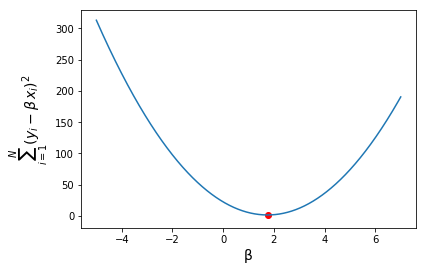

In [306]:
npoints = 2000
beta = np.linspace(-5,7,npoints)
fun_val = cost(beta) # for b in beta]
plt.plot(beta,fun_val)
plt.scatter(beta[np.argmin(fun_val)],np.min(fun_val),color='r')
print("Beta minimum is =",beta[np.argmin(fun_val)])
print("Minimum of the loss function =",np.min(fun_val))
plt.xlabel("β",fontsize=14);
plt.ylabel("$\\sum_{i=1}^N (y_i-\\beta\\,x_i)^2$",fontsize=14);

In [310]:
def gridding(fun,a,b,npoints):
    beta = np.linspace(a,b,npoints)
    val = np.array([fun(c) for c in beta])
    return beta[np.argmin(val)], np.min(val)

Npoints = np.linspace(100,1000,100)
print("Number of iterations = ", len(Npoints))
Sol=[]
for npoi in Npoints:    
    Sol.append(gridding(cost,-4,4,npoi))

Number of iterations =  100


/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


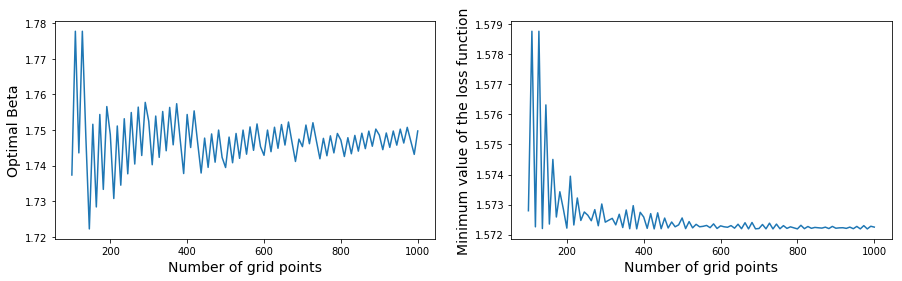

In [311]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(Npoints,np.array(Sol)[:,0]);
plt.xlabel("Number of grid points",fontsize=14);
plt.ylabel("Optimal Beta",fontsize=14);
plt.subplot(122)
plt.plot(Npoints,np.array(Sol)[:,1]);
plt.xlabel("Number of grid points",fontsize=14);
plt.ylabel("Minimum value of the loss function",fontsize=14);

#### Digression on Stopping criteria
The number of iterations in an optimization depends on a solver's stopping criteria. These criteria include several tolerances you can set. Generally, a tolerance is a threshold which, if crossed, stops the iterations of a solver.
Example of criteria:
* Maximum number of iterations $k>k_{maxiter}$;
* Absolute improvement: algorithm stops when $f_{min}^{(k)}-f_{min}^{(k+1)}< \epsilon_1$ 
* Relative improvement: algorithm stops when $f_{min}^{(k)}-f_{min}^{(k+1)}< \epsilon_1 (1+ |f_{min}^{(k)}|)$ 
* Step Tolerance: algorithm stops when $|\hat{x}^{(k+1)}-\hat{x}^{(k)}|< \epsilon_2(1+|\hat{x}^{(k)}|)$

where $k$ is the iteration index and $|\cdot|$ denotes absolute value (in more than one dimension
it is a norm), $\epsilon_i$ are  tolerances to be selected by the user.
These are general criteria (sometimes they are implemented in a different way), we will see more specialised criteria later on.

#### Drawbacks of gridding
* The precision of the solution depends on the discretisation;
* It requires a lot of function evaluations, so it may become very slow when
evaluatiing the function is costy (think about the case we have big-data).

### Bracketing
Bracketing is the process of identifying an interval which a global (local) minimum lies and then successively shrinking the interval. For many functions, *derivative* information can be helpful in directing the search for an optimum, but, for some functions, this information may not be available or may not exist. 

Several of the algorithms presented in this chapter assume **unimodality** of the objective function. A unimodal function is one where there is a unique $\hat{x}$ such that $f$ is monotonically decreasing for $x<\hat{x}$ and monotonically increasing for $x>\hat{x}$. It follows from this definition that the unique global minimum is at $\hat{x}$.

Given a unimodal function, we can bracket an interval $[a,c]$ containing the global minimum if we can find three points $a<b<c$ such that $f(a)> f(b)< f(c)$.

### Golden search method
If $f (x)$ is known to be unimodal on $[a, b]$, then it is possible to replace the interval
with a subinterval on which $f (x)$ takes on its minimum value. One approach is to
select two interior points $c < d$. This results in $a < c < d < b$.

The condition that $f (x)$ is unimodal guarantees that the function values $f (c)$ and $f (d)$ are less than

$$
\max\{ f (a), f (b)\}
$$

$$a < c < d < b$$
                                               
We have two cases to consider. If $f (c) \leq f (d)$, the minimum must occur in the subinterval $[a, d]$, and we replace
$b$ with $d$ and continue the search in the new subinterval $[a, d]$. If $f (d) < f (c)$, the
minimum must occur in $[c, b]$, and we replace a with $c$ and continue the search in $[c, b]$.

The interior points c and d are selected so that the resulting intervals $[a, c]$ and
$[d, b]$ are symmetrical; that is, $b - d = c - a$, where

$$
\begin{aligned}
c &= a + (1 - r )(b - a) = r\,a + (1 - r )b,\\
d &= b - (1 - r )(b - a) = (1 - r )a + r b,
\end{aligned}
$$

and $1/2 < r < 1$ (to preserve the ordering $c < d$). How do we select $r$?


**Derivations:**
We want to use the same $r$ in each iteration. Additionally, one of
the old interior points will be used as an interior point of the new subinterval, while the
other interior point will become an endpoint of the new subinterval.
Thus, on each iteration only one new point will have to be found and only one new
function evaluation will have to be made.

Therefore if $f(c)<f(d)$ then

$$
\begin{aligned}
\frac{d-a}{b-a} &= \frac{c-a}{d-a} \\
\frac{r(b-a)}{b-a} &= \frac{(1-r)(b-a)}{r(b-a)} \\
\frac{r}{1} &= \frac{(1-r)}{r} \\
r^2+r-1 &= 0\\
r &= \frac{-1\pm \sqrt{5}}{2}
\end{aligned}
$$

We only consider the solution $r>0.5$ and so
$$
r = \frac{-1+\sqrt{5}}{2}
$$
that is the **Golden ratio**.

Similarly, if $f (d) < f (c)$, $r = \frac{-1+\sqrt{5}}{2}$
The next example compares the root-finding method with the golden search method.

<div class="alert alert-block alert-info">
<b>Test:</b> Find the minimum of the unimodal function $f (x) = x^2 - sin(x)$ on the
interval $[0, 1]$ using GoldenSectionSearch. True value: $\hat{x}=0.4501836$ and $f(\hat{x})= -0.2324656$.
</div>


In [312]:
from math import sqrt
ϕ = (1 + sqrt(5))/2

def golden_section_search(f, a, b, max_iter, plotting=True): #from the Book pag.41
    a0 =a
    b0=b
    ρ = φ-1
    d = ρ * b + (1 - ρ)*a
    yd = f(d)
    for i in range(max_iter-1):
        c = ρ*a + (1 - ρ)*b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c   
        if plotting==True:
            plt.figure()
            xx = np.linspace(a0,b0,100)
            plt.plot(xx,f(xx))
            plt.scatter(np.array([a,b]),np.array([a,b])*0)
            plt.scatter(np.array([a,b]),np.array([f(a),f(b)]))

    return (a, b) if a<b else (b, a)

(0.4458247200067297, 0.4589803375031546)

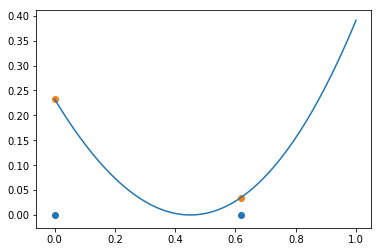

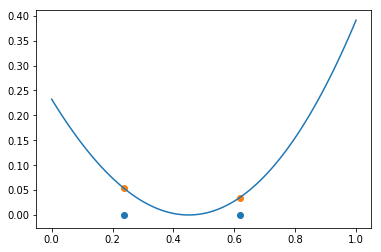

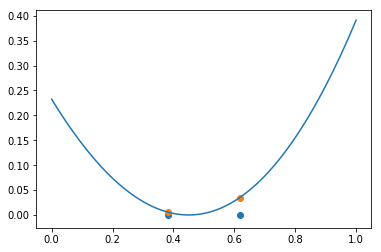

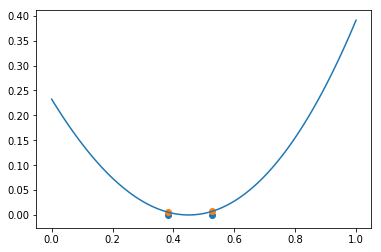

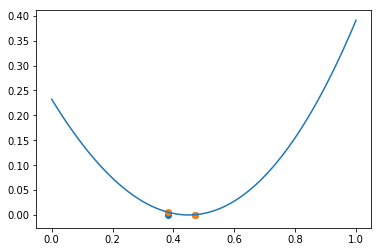

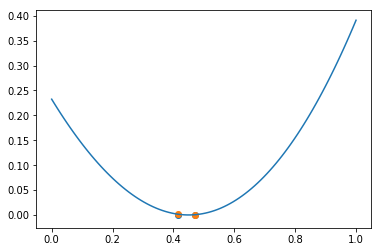

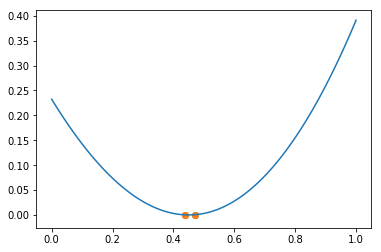

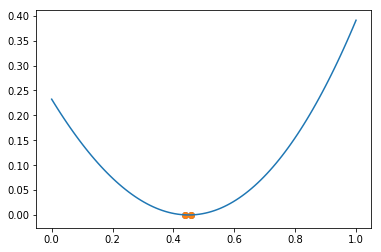

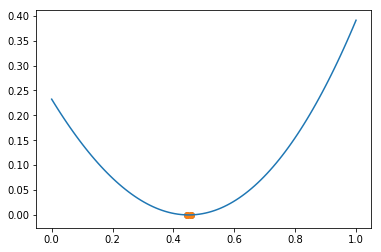

In [313]:


f = lambda x: x**2 - np.sin(x) + 0.2324656 #the minimum of this function is zero
a = 0
b = 1
golden_section_search(f,a,b,10)

Let's know apply it to the LS function. First of all we need to find an initial bracket, that is an initial interval $[a,b]$, see Book Ch.3

In [314]:
def bracket_minimum(f, x=0, s=1e-2, k=2.0): #From the Book, pag.36
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    while True:
        c, yc = b + s, f(b + s)
        if yc > yb:
            return (a, c) if a<c else (c, a)        
        a, ya, b, yb = b, yb, c, yc
        s *= k

In [315]:
a,b = bracket_minimum(cost, x=-1, s=1e-2, k=2.0)
print(a,b)
print("Beta minimum is =",beta_opt)
print("GoldenSectionSearch optimum=",golden_section_search(cost, a,b, 100, plotting=False))

0.2800000000000001 4.12
Beta minimum is = 1.7467761786502227
GoldenSectionSearch optimum= (1.7467761804757527, 1.746776180475753)


##### Digression on Numerical precision
When implementing the method on a computer, there can be problems with finite precision, so there are often additional convergence tests or limits to the number of iterations. 
Although f is continuous, finite precision may preclude a function value ever being zero. For example, consider $f(x) = x - \pi$; there will never be a finite representation of x that gives zero. Additionally, the difference between a and b is limited by the floating point precision; i.e., as the difference between a and b decreases, at some point the midpoint of $[a, b]$ will be numerically identical to (within floating point precision of) either a or b. 

#### Root-finding methods
In this case, the optimisation algorithm to find the minimum of a univariate convex function is based on the
idea that the minimum $\hat{x}$ of the function is the value $\hat{x}$ of $x$ such that
$$
f'(\hat{x})=0
$$
So it is the unique root of the function $f'(x)$.

In [316]:
#let's plot it
def dcost(β):
    if isinstance(β,np.ndarray)==False:
        β = np.array([β])
    acc = []
    for b in β:
        acc.append(-np.sum((y-b*x)*x))
    return np.array(acc)



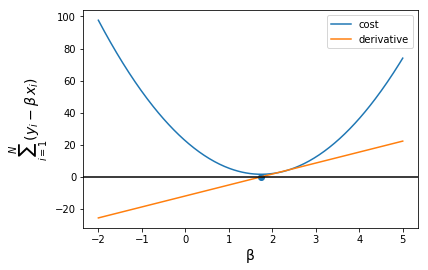

In [317]:
beta = np.linspace(-2,5,300)
fun_val = cost(beta) # for b in beta]
plt.plot(beta,fun_val,label='cost')
dfun_val = dcost(beta)# 
plt.plot(beta,dfun_val,label='derivative')
plt.axhline(0,color='k')
plt.xlabel("β",fontsize=14);
plt.ylabel("$\\sum_{i=1}^N (y_i-\\beta\\,x_i)$",fontsize=14)
plt.scatter(beta_opt,0)
plt.legend()

##### Bisection method
The simplest root finding algorithm is the bisection method.

The input for the method is a continuous function f, an interval $[a, b]$, and the function values f(a) and f(b). The function values are of opposite sign (there is at least one zero crossing within the interval). Each iteration performs these steps:

* Calculate c, the midpoint of the interval, c = (a + b)/2.
* Calculate the function value at the midpoint, f(c).
* If convergence is satisfactory (that is, c - a is sufficiently small, or |f(c)| is sufficiently small), return c and stop iterating.
* Examine the sign of f(c) and replace either (a, f(a)) or (b, f(b)) with (c, f(c)) so that there is a zero crossing within the new interval.



In [318]:
def bisection(f, a, b, ϵ, plotting=True):
    if a > b:
        a,b = b,a # ensure a < b

    ya, yb = f(a), f(b)
    if ya == 0:
        b = a
    if yb == 0:
        a = b

    while b - a > ϵ:
        if plotting==True:
            plt.figure()
            xx = np.linspace(a0,b0,100)
            plt.plot(xx,cost(xx))
            plt.scatter(np.array([a,b]),np.array([a,b])*0)
            plt.scatter(np.array([a,b]),np.array([cost(a),cost(b)]))
        x = (a+b)/2
        y = f(x)
        if y == 0:
            a, b = x, x
        elif np.sign(y) == np.sign(ya):
            a = x
        else:
            b = x
    return (a,b)
    


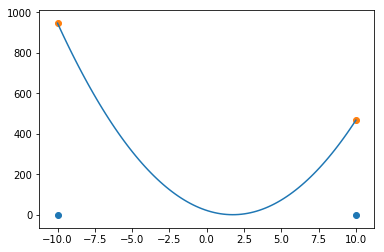

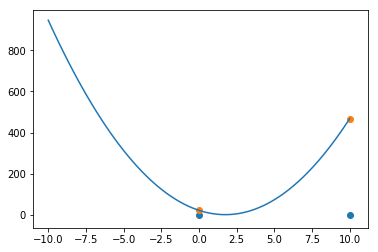

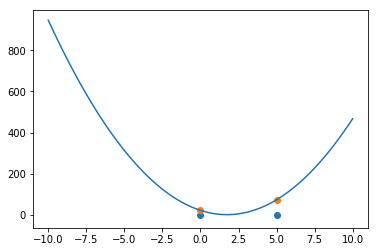

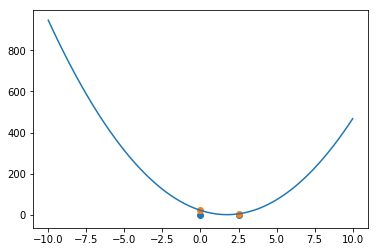

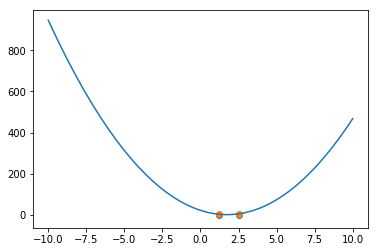

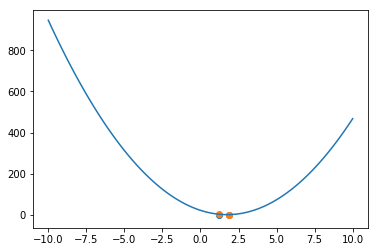

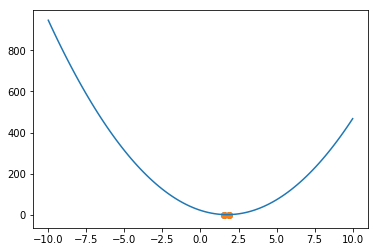

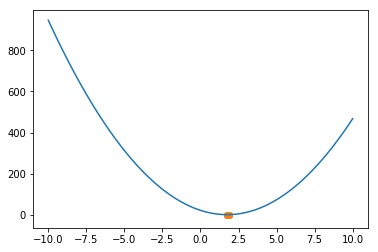

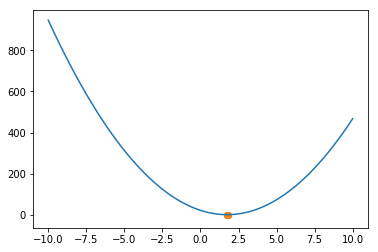

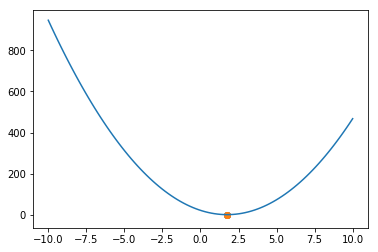

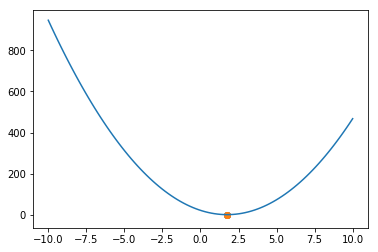

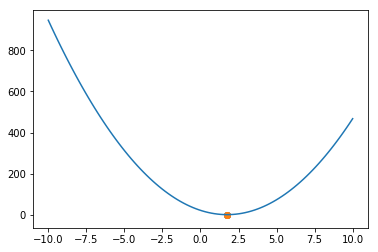

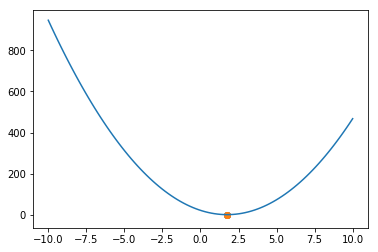

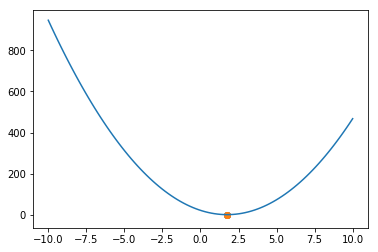

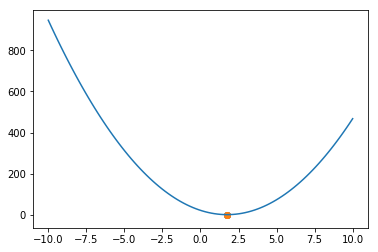

In [319]:
a0 = -10
b0 =10
a,b = bisection(dcost,a0,b0,0.001)

### Gradient
Let's start with a scalar function $f$, which maps the input $x$ to the output $y$: 

$$y = f(x)$$

Here, $f$ could be a polynomial, exponential, or whatever your favorite kind of mathematical function is. 

Let's now  _approximate_ the function $f$ around a particular point $x_0$ with a straight-line function $df$:

$$df(x) = f(x_0) + f'(x_0)(x - x_0)$$

this is the **first order** Taylor expansion. 

**Reminder:** the equation for a straight-line function can be given as: $y = m x + c$, where $m$ is the slope of the line and $c$ raises the function. If we want the function to go through a given point $(x_0, y_0)$, then we can change the equation to the following: $y = m (x - x_0) + y_0$. Notice, we just shifted the line along the $x$-axis and made sure the function is raised by $y_0$.

<center>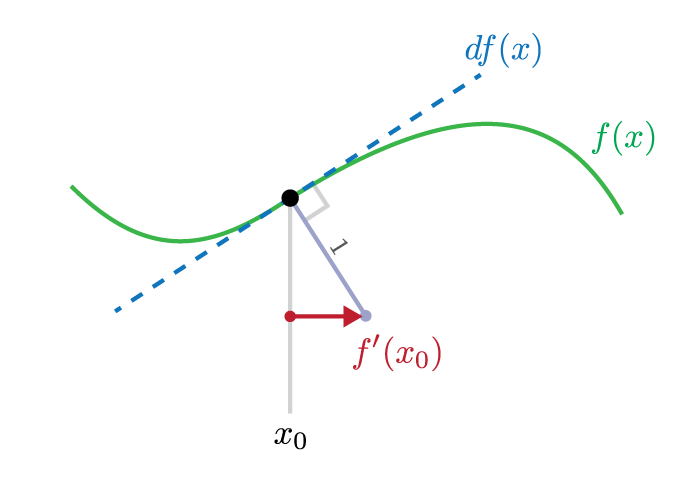</center>

The picture shows that we can use the derivative $f' = \frac{d f}{dx}$ to construct the best linear approximation to a function $f$ around a specific point $x_0$. Specifically, the derivative gives us the _slope_. If the function above was horizontal at $x_0$, you can see that the gradient $f'(x_0)$ would be zero.

Notice the _crucial_ fact that the gradient $f'(x_0)$ points in the _direction_ in which ${f(x)}$ _increases_, and the magnitude tells us _how quickly_ it increases. Here, the gradient is positive, which tells us the function is increasing to the *right*, and the large magnitude tells us it is increasing relatively quickly.

#### What did we do?

Before we continue, let's make sure we understand it. We just approximated some function $f$ around a point $x_0$ with a straight line. Doing this gave us some important information: the direction in which the function is increasing ${f'(x_0)}$. In other words, what direction we should move $x_0$ in to find a higher value of our function $ f$ - and an idea of how much we should move $x_0$.

In optimization, this is useful because we can use our function $ f$ to *compare* different items, and we can use the direction ${f'(x_0)}$ to get *better* items. In this case, $ f$ is our *metric* and the value $x_0$ is our current *item*. We then follow the direction ${f'(x_0)}$ (near $x_0$) to get a *better* item than $x_0$.

In [320]:
#@title Helper functions (RUN ME) (double click to unhide/hide the code)
def f(x):
  return -np.cos(x)

def tangent_f(x):
  return np.sin(x)

def df(x, x_0):
  return tangent_f(x_0) * (x - x_0) + f(x_0)

def perpindicular_unit_f(x_0):
  slope_f = tangent_f(x_0)
  y_0 = f(x_0)
  
  x_1 = slope_f / np.sqrt(2) + x_0
  y_1 = -x_1 / slope_f + y_0 + x_0 / slope_f
  
  return [[x_0, x_1], [y_0, y_1]]

def interactive_gradient_visual(x_0):
  # change the fontsize for better visibility
  init_size = plt.rcParams["font.size"] # store initial font size
  plt.rcParams.update({'font.size': 22}) # update the size
  
  plt.figure(figsize=(12, 8))
  
  x = np.linspace(-np.pi, 2 * np.pi)
  f_x = f(x)
  
  # plot f(x)
  plt.plot(x, f_x, label=r"$f(x)$", color="green")
  
  # add a point showing where x_0 falls on f(x)
  plt.plot(x_0, f(x_0), marker="o", color="black")
  
  # plot the tangent line to f(x) at x_0
  plt.plot(x, df(x, x_0), linestyle="--", color="cornflowerblue", label=r"$df(x)$")
  
  # plot the normal vector to the tangent
  perp_unit_vector = perpindicular_unit_f(x_0)
  plt.plot(perp_unit_vector[0], perp_unit_vector[1], color="dimgray")
  
  # drop a vertical line from x_0
  plt.plot([x_0, x_0], [f(x_0), -3.1], color="silver")
  
  # plot the positive direction of change vector
  [[x_0, x_1], [y_0, y_1]] = perp_unit_vector
  dx = x_1 - x_0
  dy = 0 # y_1 - y_1
  arrow = plt.arrow(
      x_0, y_1, dx, dy,
      color="red", label=r"$f'(x_0)$",
      lw=3, head_width=np.abs(x_1 - x_0)/10, length_includes_head=True
  )
  plt.plot([x_0, x_1], [y_1, y_1], color="red", label=r"$f'(x_0)$")
  
  plt.legend(loc="upper left")
  plt.xlim(-3.1, 6.2)
  plt.ylim(-3.1, 3.1)
  plt.xlabel(r"$x_0$")
  plt.show()
  
  # reset to initial font size
  plt.rcParams.update({'font.size': init_size})

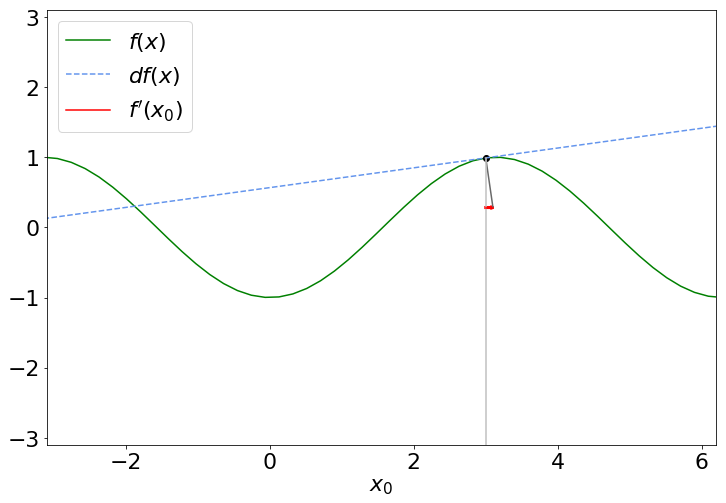

In [321]:
x_0 = 3 
interactive_gradient_visual(x_0)

Again, notice how the gradient ${f'(x_0)}$ (the red arrow) always points in the direction where the funciton ${f(x)}$ is increasing. Also notice how the magnitude (length of the arrow) of the gradient ${f'(x_0)}$ increases when the slope increases.

### Higher dimensions
In fact, a similar thing happens if we are working with a function whose input is a *vector* rather than a scalar. The same idea applies, but we must replace the multiplication between the *scalar* derivative ${ f'(x_0) }$ and the *scalar* difference $(x - x_0)$, with a dot product between the *vector* gradient ${\nabla f(\vec x_0)}$ and the _vector_ difference $(\vec x - \vec x_0)$:

$${d\hspace{-0.3ex}f(\mathbf x)} = f(\mathbf x_0) + {\nabla f(\mathbf x_0)}\cdot  (\mathbf x - \mathbf x_0)$$

<center>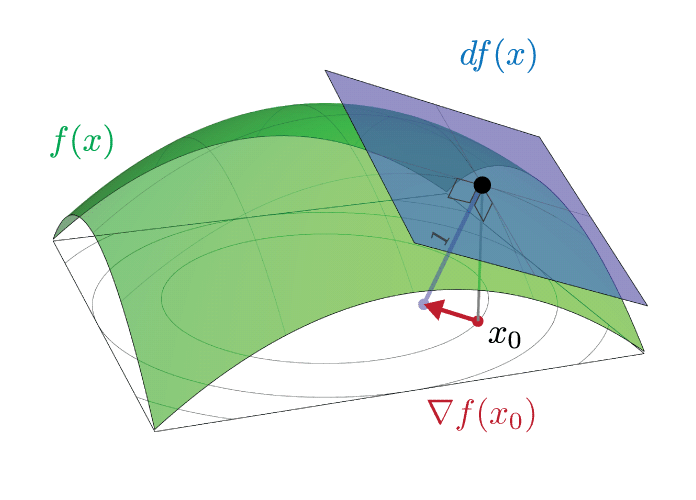</center>


As the picture above shows, this vector gradient represents the slope of the *plane* that approximates the surface of $f$ near the point $x_0$. The gradient points in the direction of steepest ascent ("the uphill direction"), and its magnitude tells us the steepness of the plane (so zero gradient means the plane is flat).

**Note**: the gradient points in the direction of *increase* of the function. For gradient based minimization(discussed next), we will instead be travelling in the direction of *decrease* of the loss. This means that our updates will simply be based on the negative of the gradient.

### Line Search algorithm
Let us go back to our minimisation problem. Suppose we have a real-valued function $f$ that we wish to minimize. Our goal is to
find the point $\hat{x}$ in the domain of f such that $f (\hat{x} )$ is the smallest value in the
range of $f$. 

For some functions (like for least-squares), we can use techniques from calculus to analytically
obtain this minimizer. 

However, in practical applications, this is often impossible. 

A
line search algorithm starts with an initial guess at the minimizer, call it $x_0$ , and
iteratively produces a sequence of points $x_1$, $x_3$, $x_3,\dots$  that hopefully converge to
the minimizer $\hat{x}$.



**Algorithm:**
1.  Test for convergence: If the termination conditions are satisfied at $x^{(k)}$, then it is taken (accepted) as a "solution". If so,stop. Otherwise, go to step 2.
2. Compute a search direction, say $d_k$. This might be a direction in which the function value is known to decrease within the feasible region.
3. Compute a step length, say $k$ such that 
$$
f(x^{(k)}+\alpha^{(k)}d^{(k)})<f(x^{(k)})
$$
This necessitates a one-dimensional (or line) search.
4. Define the new iterate by setting 
$$
x^{(k+1)}=x^{(k)}+\alpha^{(k)}d^{(k)}
$$ 
and return to step 1.

**N-dimension:**

The above algorithm also works in N-dimension. There are many ways we can define the search direction, one is

$$
d^{(k)} = -\nabla f(x^{(k)}) %\frac{\nabla f(x^{(k)})}{||\nabla f(x^{(k)}||}
$$

another

$$
d^{(k)} = -\frac{\nabla f(x^{(k)})}{||\nabla f(x^{(k)}||}
$$

where $\alpha$ is a scalar that is called the step size and $d^{(k)}$ called the search direction.

In [322]:
X = x.reshape(-1,1) #np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
#let's plot it
def cost(β):
    if len(β.shape)==1:
        β=β.reshape(-1,1)
    acc = []
    for b in β:
        acc.append(np.sum((y-X.dot(b))**2))
    return np.array(acc)

def gradient(β):
    if len(β.shape)==1:
        β=β.reshape(-1,1)
    acc = []
    for b in β:
        acc.append(np.sum(-(y-X.dot(b)).dot(X)))
    return np.array(acc)

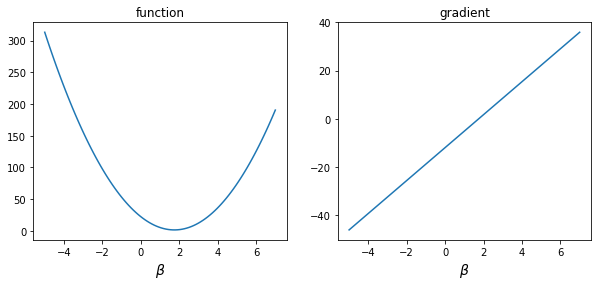

In [323]:
beta = np.linspace(-5,7,100)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(beta,cost(beta))
plt.xlabel("$\\beta$",fontsize=14)
plt.title("function")
plt.subplot(122)
plt.plot(beta,gradient(beta))
plt.xlabel("$\\beta$",fontsize=14)
plt.title("gradient");

This is the general optimization routine

`def line_search(f, x, d):
    if np.norm(d) < ϵ:
        return x
    objective = lambda α : f(x + α*d)
    a, b = bracket_minimum(objective)
    α = minimize(objective, a, b)
    return x + α*d
`
We can choose any algorithm for 
* bracket_minimum
* minimize

Let's implement it.

In [324]:
def line_search(f, x, d, ϵ_x=0.0001, ϵ_d=0.0001):
    term = False
    if np.linalg.norm(d) < ϵ_d:
        print("Gradient norm below threshold")
        term = True
        return x
    objective = lambda α : f(x + α*d)
    a, b = bracket_minimum(objective)
    a, b  = golden_section_search(objective, a, b, max_iter = 5, plotting=False)
    α = (a+b)/2
    if np.linalg.norm(x+a*d-x)<ϵ_x:
        print("Step Tolerance below threshold")
        term = True
    return x + α*d, term

def local_descent(β,cost, gradient,steps=10, α=None, ϵ_x=0.0001, ϵ_d=0.0001,  plotting=False):
    Tmp = [β]
    for iteration in range(steps):
        d = gradient(β)
        d = -d/np.linalg.norm(d) 
        #print(β,d)
        β, term = line_search(cost, β, d, ϵ_x=ϵ_x, ϵ_d=ϵ_d)
        if term == True:
            break
        Tmp.append(β)
    #print(np.array(Tmp))
    return Tmp


[7.         2.06674948 1.75842133 1.74640506 1.74730676 1.74640506
 1.74730676 1.74640506 1.74730676 1.74640506 1.74730676]


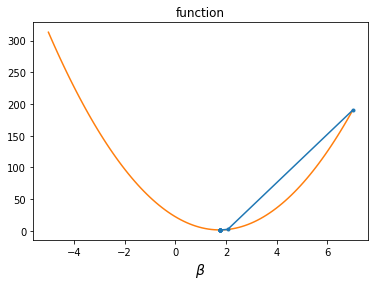

In [325]:
    
β = np.array([7])
Beta = local_descent(β, cost, gradient,steps=10)
Beta = np.array(Beta)[:,0]
print(Beta)
plt.plot(Beta,cost(Beta),'.-',Zorder=100)
plt.plot(beta,cost(beta))
plt.xlabel("$\\beta$",fontsize=14)
plt.title("function");

### Disadvantages
The computation of the optimal $\alpha$ can be computationally intensive when the cost function
is complex.

Some algorithms use a fixed step factor. Large steps will tend to result in faster
convergence but risk overshooting the minimum. Smaller steps tend to be more
stable but can result in slower convergence. 
A fixed step factor is referred to as a **learning rate**.
Another method is to use a decaying step factor:

$$
\alpha^{(k)} =\gamma^{k-1} \alpha^{(1)} 
$$

where $\gamma \in (0,1]$


#### Constant learning rate

In [326]:
def local_descent_approximate(β, cost, gradient, steps=10, α=0.1, ϵ_x=None, ϵ_d=None, plotting=True):
    Tmp = [β]
    for iteration in range(steps):
        d = -gradient(β)
        β = β+ α*d
        Tmp.append(β)
    if plotting==True:
        Beta=np.array(Tmp); plt.plot(Beta,cost(Beta),'.-',Zorder=100); plt.plot(beta,cost(beta))
        plt.xlabel("$\\beta$",fontsize=14); plt.title("function");
    return Tmp
interact(local_descent_approximate,α=(0.01,0.5,0.01),β=fixed( np.array([6])),cost=fixed(cost), gradient=fixed(gradient), ϵ_x=fixed(None), ϵ_d=fixed(None), plotting=fixed(True));

interactive(children=(IntSlider(value=10, description='steps', max=30, min=-10), FloatSlider(value=0.1, descri…

### MAE regression
In regression,

We now seek estimated values of the unknown parameters that minimize the sum of the absolute values of the residuals:

$$
   S = \sum_{i=1}^N |y_i - f(x_i)|. 
$$

The simplest methods of estimating parameters in a regression model that are less sensitive to outliers than the least squares estimates, is to use least absolute deviations. We will use **automatic differentiation** to compute the gradient because it is an extremely useful tool for more complex algorithms.

In [357]:
X = x.reshape(-1,1) #np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
#let's plot it
def cost(β):
    if np.isscalar(β):
        β=np.array([β])
    if len(β.shape)==1:
        β=β.reshape(-1,1)
    acc = []
    #print(β)
    for b in β:
        acc.append(np.sum(np.abs(y-X.dot(b))))
    return np.array(acc)

def gradient(β):
    if len(β.shape)==1:
        β=β.reshape(-1,1)
    acc = []
    for b in β:
        acc.append(np.sum(-np.sign(y-X.dot(b)).dot(X)))#
    return np.array(acc)

We have arbitraily defined to be 0 the derivative of $|x|$ at x=0, but the derivative a zero does not exist.

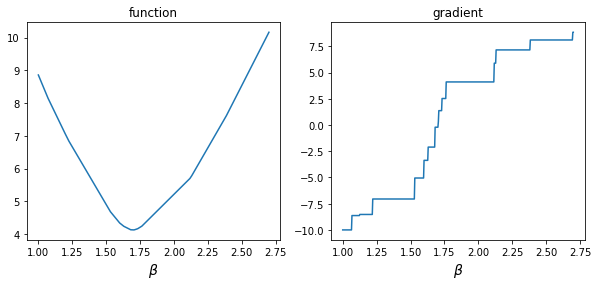

In [363]:
beta = np.linspace(1,2.7,500)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(beta,cost(beta))
plt.xlabel("$\\beta$",fontsize=14)
plt.title("function")
plt.subplot(122)
plt.plot(beta,gradient(beta))
plt.xlabel("$\\beta$",fontsize=14)
plt.title("gradient");

The gradient is not a continuous function, because $|x|$ is not differentiable at $x=0$.

In [364]:
#We apply gridding to find the minimum
Npoints = np.linspace(100,2000,100)
print("Number of iterations = ", len(Npoints))
Sol=[]
for npoi in Npoints:    
    Sol.append(gridding(cost,-4,4,npoi))

Number of iterations =  100


/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


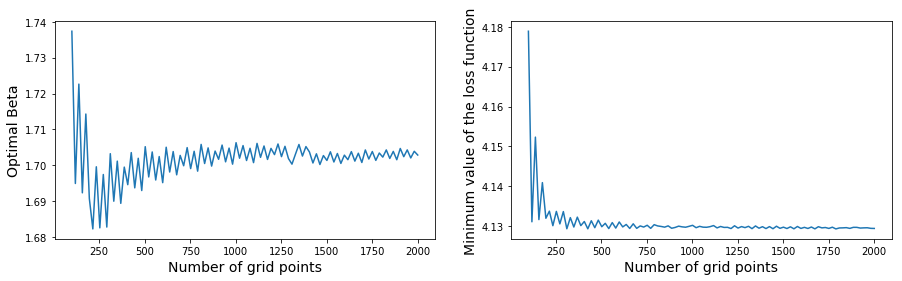

In [365]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(Npoints,np.array(Sol)[:,0]);
plt.xlabel("Number of grid points",fontsize=14);
plt.ylabel("Optimal Beta",fontsize=14);
plt.subplot(122)
plt.plot(Npoints,np.array(Sol)[:,1]);
plt.xlabel("Number of grid points",fontsize=14);
plt.ylabel("Minimum value of the loss function",fontsize=14);

[7.         1.37424432 1.68257247 1.70454808 1.70364638 1.70274468
 1.70364638 1.70274468 1.70364638 1.70274468 1.70364638 1.70274468
 1.70364638 1.70274468 1.70364638 1.70274468 1.70364638 1.70274468
 1.70364638 1.70274468 1.70364638]


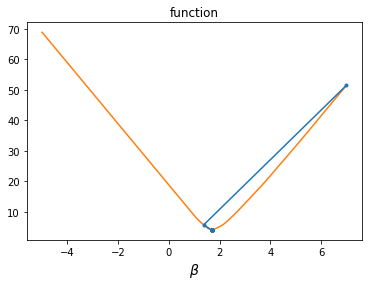

In [355]:
β = np.array([7])
Beta = local_descent(β, cost, gradient,steps=20)
Beta = np.array(Beta)[:,0]
print(Beta)
plt.plot(Beta,cost(Beta),'.-',Zorder=100)
plt.plot(beta,cost(beta))
plt.xlabel("$\\beta$",fontsize=14)
plt.title("function");

In [356]:
#we apply local_descent_approximate
interact(local_descent_approximate,α=(0.01,0.5,0.01),β=fixed( np.array([6])),cost=fixed(cost), gradient=fixed(gradient), ϵ_x=fixed(0.0001), ϵ_d=fixed(0.0001), plotting=fixed(True));

interactive(children=(IntSlider(value=10, description='steps', max=30, min=-10), FloatSlider(value=0.1, descri…

It does not converge due to the jumps in the gradient of the loss function

#### Smooth Approximations to the L1-Norm
Huber function
$$
h(x)={\begin{cases}{\frac {1}{2}}x^{2}&{\textrm {for}}|x|\leq \epsilon ,\\\epsilon\,|x|-{\frac {1}{2}}\epsilon ^{2}&{\textrm {otherwise.}}\end{cases}}
$$

this is differentiable also at $|x|=\epsilon$

#### Digression on automatic differentiation (AD)
AD exploits the fact that every computer program, no matter how complicated, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). By applying the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) for derivatives repeatedly to these operations, derivatives of arbitrary order can be computed automatically, accurately to working precision, and using at most a small constant factor more arithmetic operations than the original program

Note that AD is different from numpy.gradient or numpy.diff

In [366]:
import autograd.numpy as np  # wrapped numpy
from autograd import grad    #

def loss(x,y,θ):
    return (y-x.dot(θ))**2 

def cost(θ):
    return np.sum(loss(X,y,θ))
        
gradcost = grad(cost)
gradcost(np.array([beta_opt]))

array([-1.1900203e-15])

In [367]:
class GenericLoss_LinearRegression():
    def __init__(self, θ, loss):
        self.θ = θ
        self.loss = loss
        
    def fit(self,X,y,method,Optimparam):    
        #cost function
        def cost(θ):
            return np.sum(self.loss(X,y,θ))
        #automatic diff gradient function
        gradcost = grad(cost)

        #call the optimizer
        θ = method(self.θ,  cost, gradcost, steps=Optimparam['steps'], α=Optimparam['α'], ϵ_x =  Optimparam['ϵ_x'], ϵ_d =  Optimparam['ϵ_d'], plotting=False)
        self.θ = θ[-1]
        
    def predict(self, X):
        return X.dot(self.θ)

Optimimparam = {
    'α':0.1,
    'steps':3,
    'ϵ_x':0.0001,
    'ϵ_d':0.0001
}


Optimal parameter= [1.74633669]


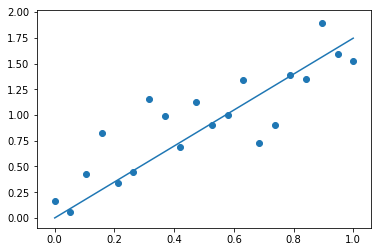

In [368]:
#define my model
GLR = GenericLoss_LinearRegression(np.array([6.0]), loss)
#fitting the data
GLR.fit(X,y,local_descent, Optimimparam)
print("Optimal parameter=",GLR.θ)
#prediction
ypred =  GLR.predict(X)
plt.plot(X,ypred)
plt.scatter(X,y)

Optimal parameter= [1.53408398]


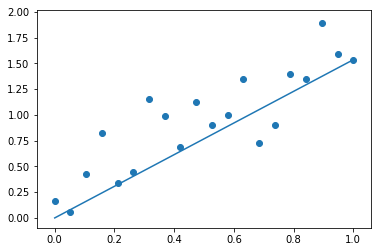

In [369]:
#define my model
GLR = GenericLoss_LinearRegression(np.array([6.0]), loss)
#fitting the data
Optimimparam = {
    'α':0.1,
    'steps':3,#increase n steps
    'ϵ_x':0.0001,
    'ϵ_d':0.0001
}
GLR.fit(X,y,local_descent_approximate, Optimimparam)
print("Optimal parameter=",GLR.θ)
#prediction
ypred =  GLR.predict(X)
plt.plot(X,ypred)
plt.scatter(X,y)

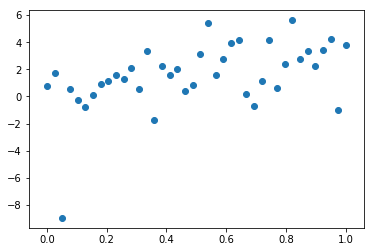

In [370]:
#2D regression with outlier
np.random.seed(1)
x = np.linspace(0,1,40)
β1 = 2
β0 = 1
y =β0 + x*β1 + np.random.laplace(scale=1.2,size=len(x))
y = y.reshape(-1,1)
plt.scatter(x,y)
X=np.hstack([np.ones((len(x),1)),x.reshape(-1,1)]);

#### MSE Linear regression

Numerical Optimal parameter= [-0.10298582  3.38468033]
Theorethical optimal values [-0.35019124  3.83300239]


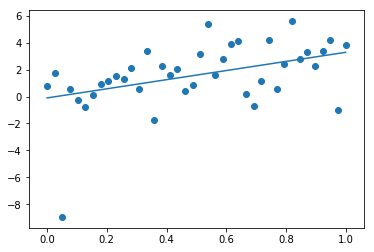

In [397]:
def loss(x,y,θ):
    return (y-x.dot(θ))**2         
Optimimparam = {
    'α':0.1,
    'steps':5,
    'ϵ_x':0.0001,
    'ϵ_d':0.0001}
#define my model
GLR = GenericLoss_LinearRegression(np.array([[-1.0],[-2.0]]), loss)
#fitting the data
GLR.fit(X,y,local_descent, Optimimparam)
print("Numerical Optimal parameter=",GLR.θ[:,0])
print("Theorethical optimal values", np.linalg.multi_dot([np.linalg.inv(X.T.dot(X)),X.T,y])[:,0])
#prediction
ypred_LR =  GLR.predict(X); plt.plot(X[:,1],ypred_LR) ;plt.scatter(X[:,1],y[:,0])

Numerical Optimal parameter= [-0.21685507  3.58474666]
Theorethical optimal values [-0.35019124  3.83300239]


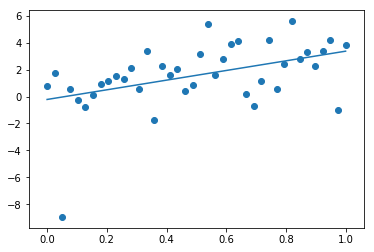

In [398]:
Optimimparam = {
    'α':0.01,
    'steps':50,
    'ϵ_x':0.0001,
    'ϵ_d':0.0001}
#define my model
GLR = GenericLoss_LinearRegression(np.array([[-1.0],[-2.0]]), loss)
#fitting the data
GLR.fit(X,y,local_descent_approximate, Optimimparam)
print("Numerical Optimal parameter=",GLR.θ[:,0])
print("Theorethical optimal values", np.linalg.multi_dot([np.linalg.inv(X.T.dot(X)),X.T,y])[:,0])
#prediction
ypred_LR =  GLR.predict(X); plt.plot(X[:,1],ypred_LR) ;plt.scatter(X[:,1],y[:,0])

#### MAE Linear regression

Numerical Optimal parameter= [0.46680595 3.18476499]
Theorethical optimal values [-0.35019124  3.83300239]


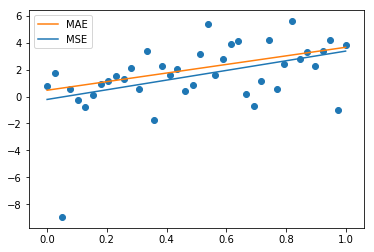

In [404]:
def loss(x,y,θ): #huber loss
    ϵ = 0.001
    v=(ϵ-np.abs(y-x.dot(θ)))>=0+0.0
    return v*(y-x.dot(θ))**2    +(1-v)*ϵ*(np.abs(y-x.dot(θ)) -0.5*ϵ)  
                
Optimimparam = {
    'α':0.01,
    'steps':50,
    'ϵ_x':0.0001,
    'ϵ_d':0.0001}
#define my model
GLR = GenericLoss_LinearRegression(np.array([[-1.0],[-2.0]]), loss)
#fitting the data
GLR.fit(X,y,local_descent, Optimimparam)
print("Numerical Optimal parameter=",GLR.θ[:,0])
print("Theorethical optimal values", np.linalg.multi_dot([np.linalg.inv(X.T.dot(X)),X.T,y])[:,0])
#prediction
ypred_mae =  GLR.predict(X); 
plt.plot(X[:,1],ypred_mae,color='C1',label='MAE')
plt.scatter(X[:,1],y[:,0])
plt.plot(X[:,1],ypred_LR,color='C0',label='MSE')
plt.legend()

<div class="alert alert-block alert-success">
<b>Forum Question:</b> Compare the "interface" of the function fit (that is, the arguments of the function
    fit) of the class 'GenericLoss_LinearRegression' with the standard interface of a fit() function of a sklearn regression  algorithm. What is the main difference? Why did I do that?
</div>

<div class="alert alert-block alert-success">
<b>Forum Question (optional):</b> Can you write down the Pymc3 model for MAE regression? Hint:use  the Laplace likelihood 
    instead of the Normal likelihood.
</div>